In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'C:\\Users\\hp\\All EDA'

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\us_accidents.csv")
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
import datetime
plt.style.use("fivethirtyeight")

In [4]:
print("Rows       :", df.shape[0])
print("Columns    :", df.shape[1])
print("\nFeatures :", df.columns.tolist())
print("\nMissing values :", df.isnull().values.sum())
print("\nUnique values :", df.nunique())

Rows       : 1048575
Columns    : 49

Features : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values : 4933338

Unique values : ID                       1048575
Source                         2
TMC                           21
Severity                       5
Start_Time                516855
End_Time                  515146
Start_Lat                 404771
St

In [5]:
df.dtypes

ID                        object
Source                    object
TMC                        int64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [6]:
df.select_dtypes(exclude= ['int', 'float']).columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df['Description'].head()

0    Right lane blocked due to accident on I-70 Eas...
1    Accident on Brice Rd at Tussing Rd. Expect del...
2    Accident on OH-32 State Route 32 Westbound at ...
3    Accident on I-75 Southbound at Exits 52 52B US...
4    Accident on McEwen Rd at OH-725 Miamisburg Cen...
Name: Description, dtype: object

In [8]:
print(df['Source'].unique())
print(df['Description'].unique())
print(df['Timezone'].unique())
print(df['Amenity'].unique())

['MapQuest' 'MapQuest-Bing']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Accident on Albatross Rd between Looper Rd and Jim Hunt Rd.'
 'Right lane blocked and right hand shoulder blocked due to accident on I-75 Southbound at Exit 263 GA-120 Marietta Pkwy.'
 'Accident on Arrowhead Blvd at Shady Grove Cir.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]


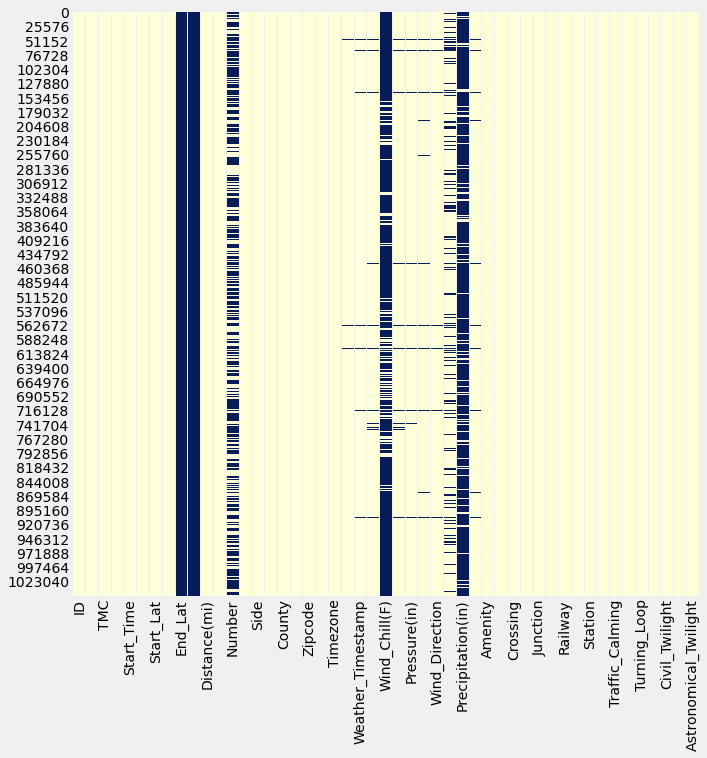

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False,cmap='YlGnBu')
plt.ioff()

In [10]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1]


for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(),3),'% missing values')

End_Lat 1.0 % missing values
End_Lng 1.0 % missing values
Number 0.622 % missing values
City 0.0 % missing values
Zipcode 0.0 % missing values
Timezone 0.001 % missing values
Airport_Code 0.01 % missing values
Weather_Timestamp 0.017 % missing values
Temperature(F) 0.023 % missing values
Wind_Chill(F) 0.835 % missing values
Humidity(%) 0.024 % missing values
Pressure(in) 0.02 % missing values
Visibility(mi) 0.028 % missing values
Wind_Direction 0.017 % missing values
Wind_Speed(mph) 0.198 % missing values
Precipitation(in) 0.884 % missing values
Weather_Condition 0.028 % missing values
Sunrise_Sunset 0.0 % missing values
Civil_Twilight 0.0 % missing values
Nautical_Twilight 0.0 % missing values
Astronomical_Twilight 0.0 % missing values


In [12]:
import warnings
import warnings
warnings.filterwarnings("ignore")
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by= 'missing_count')


ind = np.arange(missing_df.shape[0])
width = 0.5
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation= 'horizontal')
ax.set_xlabel('Count of missing_values')
ax.set_title("Number of missing values in each columns")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ix'

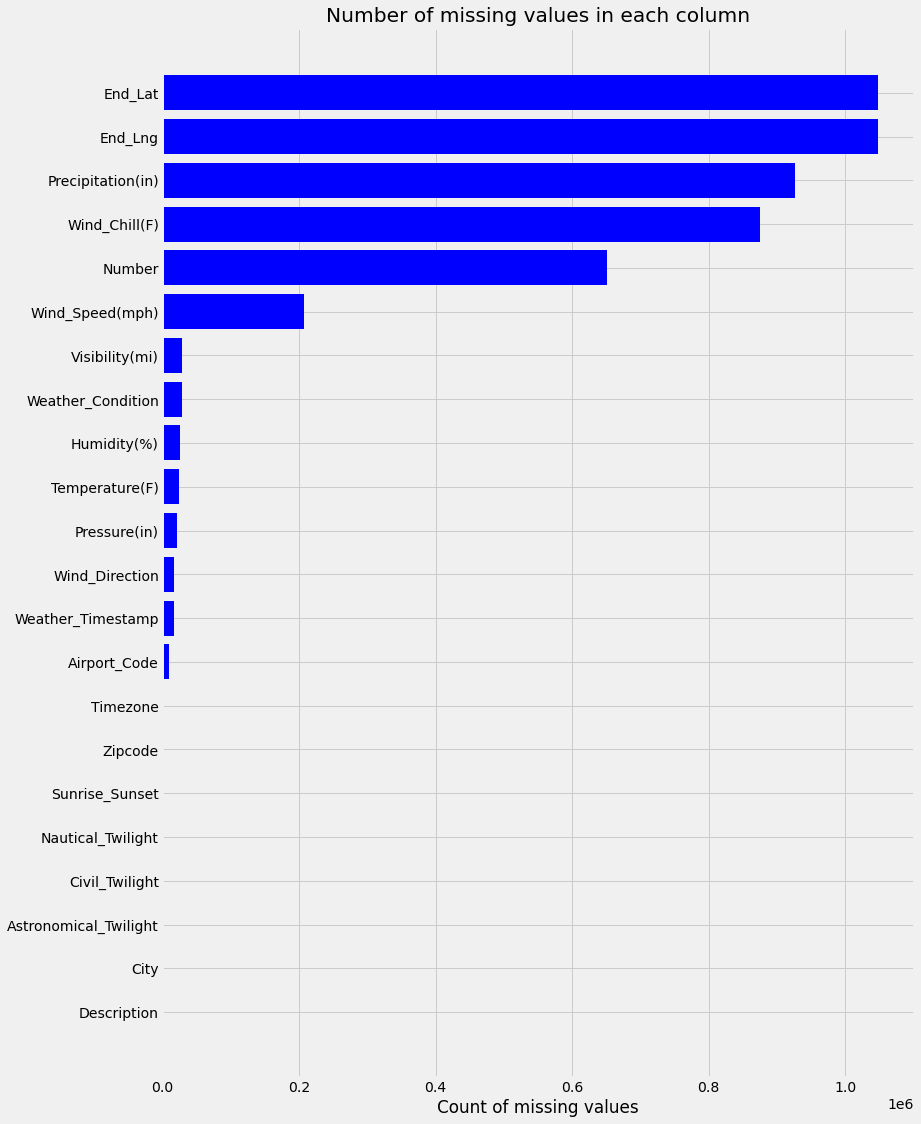

In [14]:
import warnings
import warnings
warnings.filterwarnings('ignore')
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

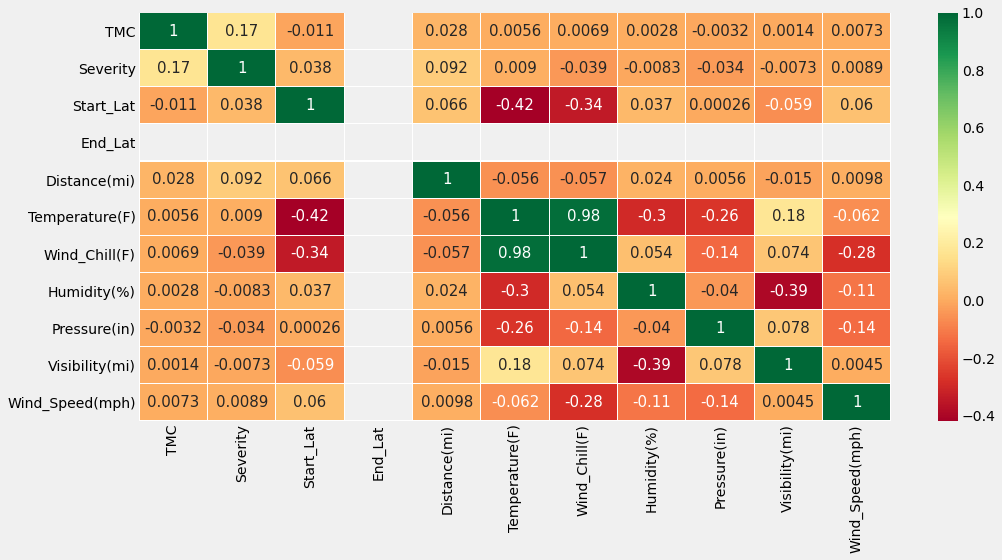

In [15]:
fig = sns.heatmap(df[['TMC', 'Severity', 'Start_Lat', 'End_Lat', 'Distance(mi)', 'Temperature(F)', 
                     'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                     'Wind_Speed(mph)']].corr(), annot=True, cmap= 'RdYlGn', linewidth= 0.2, annot_kws={'size':15})

fig= plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

ValueError: 'explode' must be of length 'x'

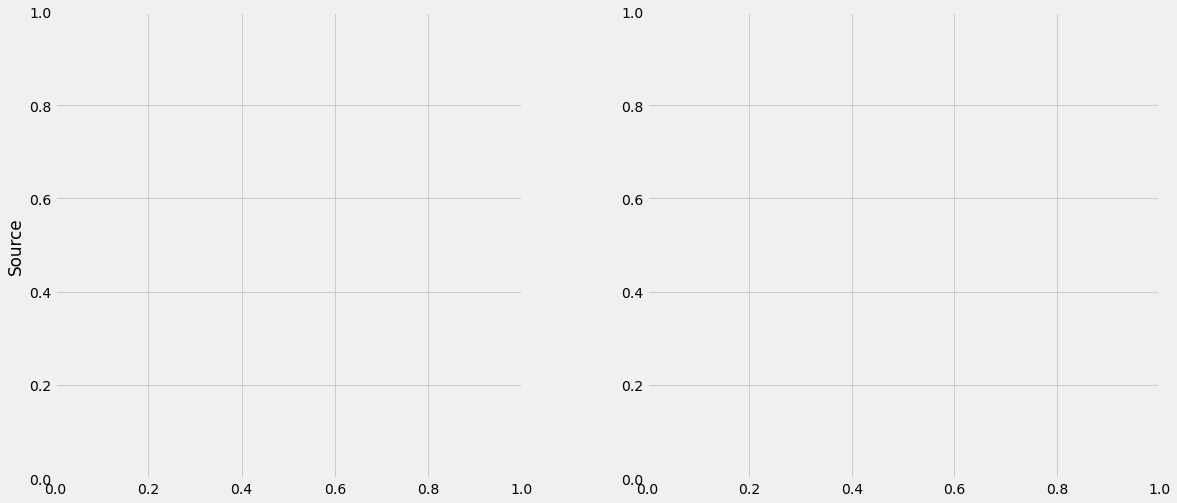

In [18]:
f,ax= plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source', data=df, ax=ax[1], order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

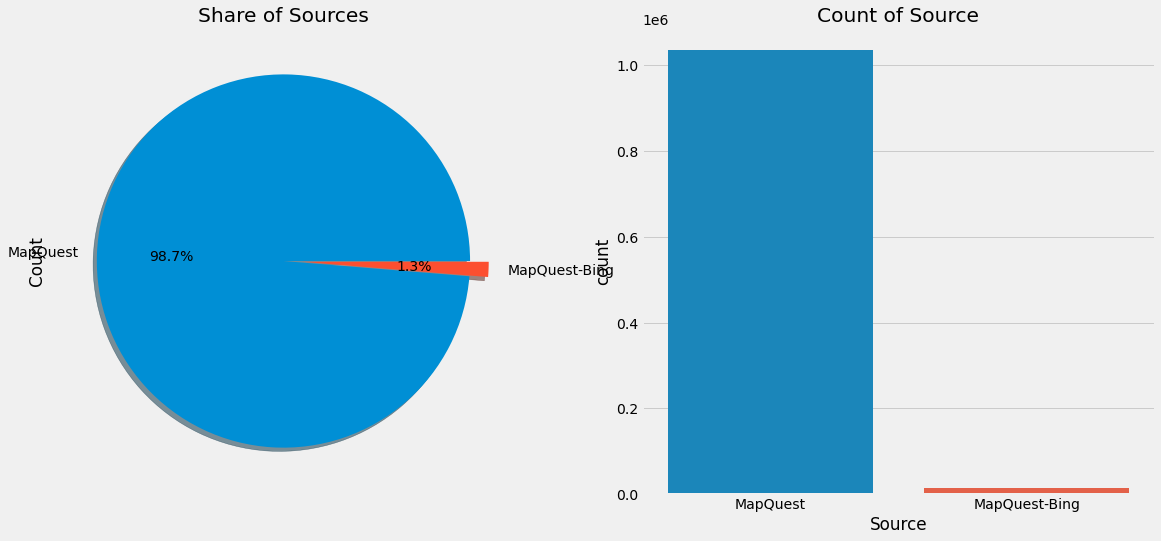

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

In [23]:
df['Side'].unique()

array(['R', 'L', ' '], dtype=object)

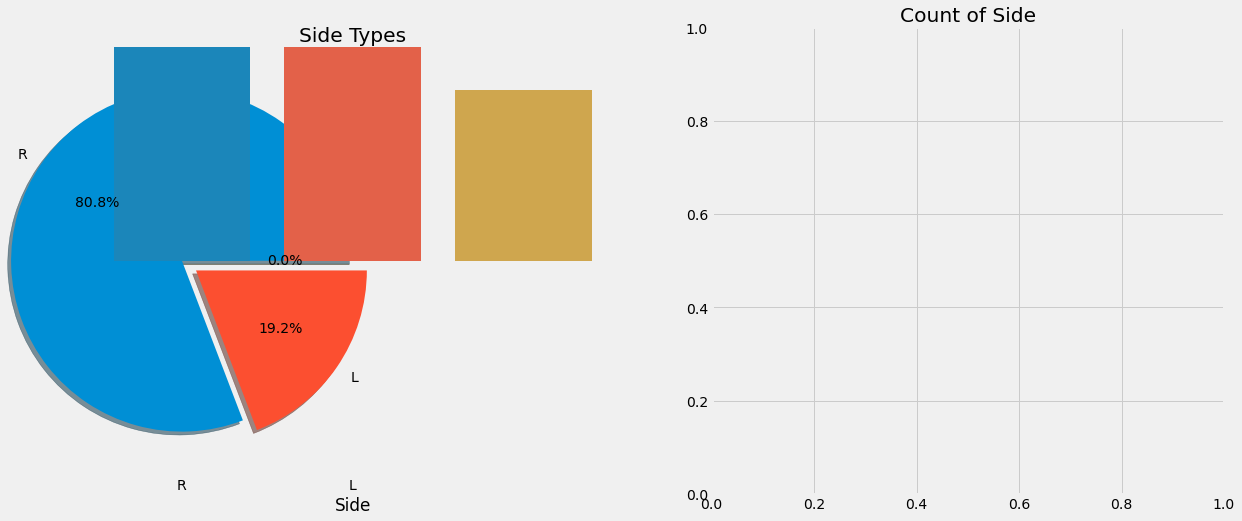

In [25]:
f,ax= plt.subplots(1,2,figsize=(18,8))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0], autopct="%1.1f%%", ax=ax[0], shadow=True)

ax[0].set_title('Side Types')
ax[0].set_ylabel('Count')
sns.countplot('Side', data=df, ax=ax[0], order=df['Side'].value_counts().index)
ax[1].set_title("Count of Side")
plt.show()


In [27]:
df.Side.value_counts()

R    847307
L    201267
          1
Name: Side, dtype: int64

In [28]:
df.Timezone.value_counts()

US/Eastern     459342
US/Pacific     291307
US/Central     263555
US/Mountain     33790
Name: Timezone, dtype: int64

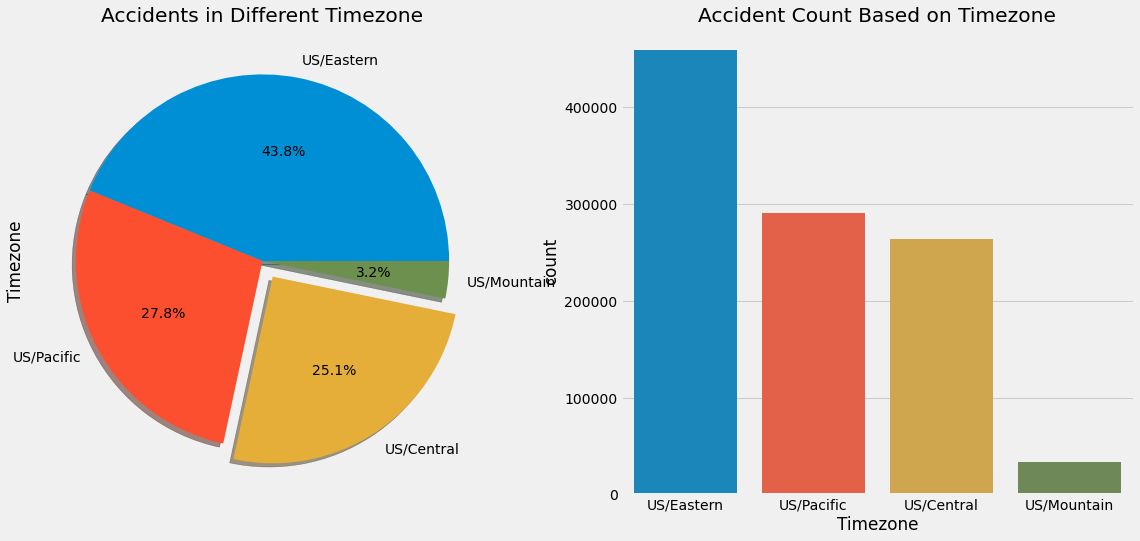

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0.1,0], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Accidents in Different Timezone")
sns.countplot('Timezone', data=df, ax=ax[1], order=df['Timezone'].value_counts().index)
ax[1].set_title("Accident Count Based on Timezone")
plt.show()

In [38]:
df.Start_Time

0          08-02-2016 05:46
1          08-02-2016 06:07
2          08-02-2016 06:49
3          08-02-2016 07:23
4          08-02-2016 07:39
                 ...       
1048570    31-05-2018 12:11
1048571    31-05-2018 12:10
1048572    31-05-2018 12:15
1048573    31-05-2018 12:20
1048574    31-05-2018 12:41
Name: Start_Time, Length: 1048575, dtype: object

In [40]:
st = pd.to_datetime(df.Start_Time, format= "%d-%m-%Y %H:%M")
end = pd.to_datetime(df.End_Time, format="%d-%m-%Y %H:%M")

In [41]:
st

0         2016-02-08 05:46:00
1         2016-02-08 06:07:00
2         2016-02-08 06:49:00
3         2016-02-08 07:23:00
4         2016-02-08 07:39:00
                  ...        
1048570   2018-05-31 12:11:00
1048571   2018-05-31 12:10:00
1048572   2018-05-31 12:15:00
1048573   2018-05-31 12:20:00
1048574   2018-05-31 12:41:00
Name: Start_Time, Length: 1048575, dtype: datetime64[ns]

In [42]:
end

0         2016-02-08 11:00:00
1         2016-02-08 06:37:00
2         2016-02-08 07:19:00
3         2016-02-08 07:53:00
4         2016-02-08 08:09:00
                  ...        
1048570   2018-05-31 13:25:00
1048571   2018-05-31 13:25:00
1048572   2018-05-31 12:59:00
1048573   2018-05-31 13:20:00
1048574   2018-05-31 13:40:00
Name: End_Time, Length: 1048575, dtype: datetime64[ns]

top 20 accident durations correspond to 95.4% of the data


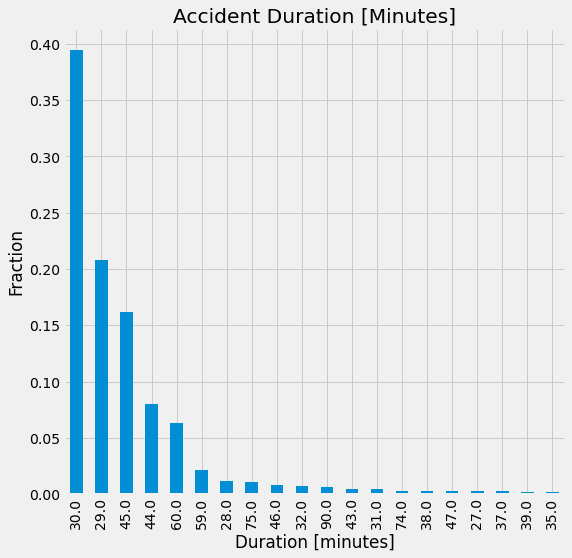

In [43]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

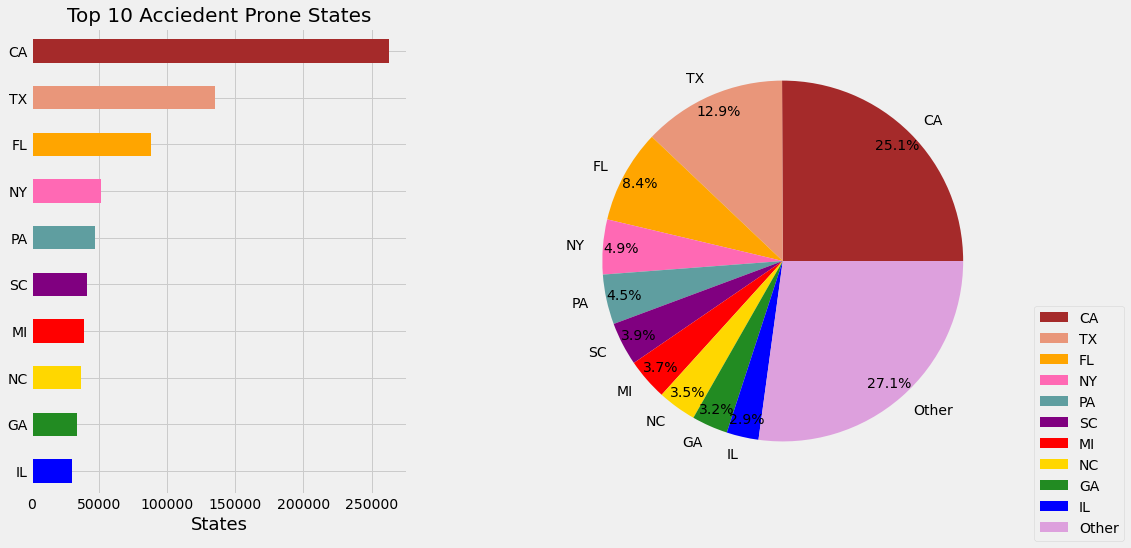

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr= ("blue", "forestgreen","gold","red","purple","cadetblue","hotpink","orange","darksalmon",
     "brown")
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr, ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States', size=18)

count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups, "counts":counts})
clr1= ('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y= 'counts', labels= groups, colors=clr1, autopct= '%1.1f%%', pctdistance=0.9, radius=1.2,
                   ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.subplots_adjust(wspace=0.5, hspace=0)
plt.ioff()
plt.ylabel('')
pass

In [49]:
df.State.value_counts()

CA    262792
TX    134798
FL     87834
NY     51447
PA     46897
SC     40692
MI     39175
NC     36314
GA     33844
IL     30097
VA     26916
OH     21950
WA     21740
NJ     16533
TN     16426
MD     16421
OK     15429
AZ     15140
MA     14758
MN     14676
LA     13431
NE     12932
AL     12452
CO      8029
CT      7485
IN      7196
MO      6735
UT      6029
KY      4796
OR      4509
IA      4075
RI      3578
WI      3405
NV      1982
MS      1609
NH      1420
NM      1314
KS      1123
DC      1121
DE       930
AR       149
WV       120
VT       102
WY        96
ID        40
ME        24
MT         7
ND         5
SD         2
Name: State, dtype: int64

In [50]:
groups

['CA', 'TX', 'FL', 'NY', 'PA', 'SC', 'MI', 'NC', 'GA', 'IL', 'Other']

In [51]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

In [52]:
df_top_Severity_State

,State,Severity
0,SD,2.000000
1,OK,2.084840
2,DE,2.113978
3,NE,2.139344
4,NC,2.144793
5,IL,2.172442
6,PA,2.190076
7,AZ,2.203567
8,LA,2.207505
9,SC,2.226408


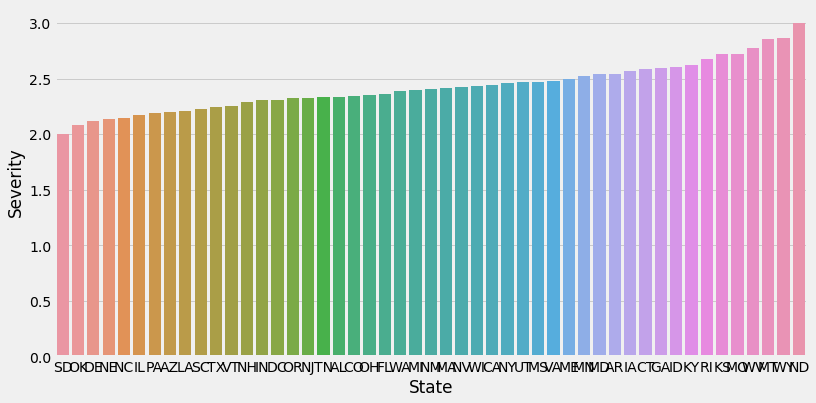

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(y='Severity', x= 'State', data=df_top_Severity_State.head(49))
plt.ioff()

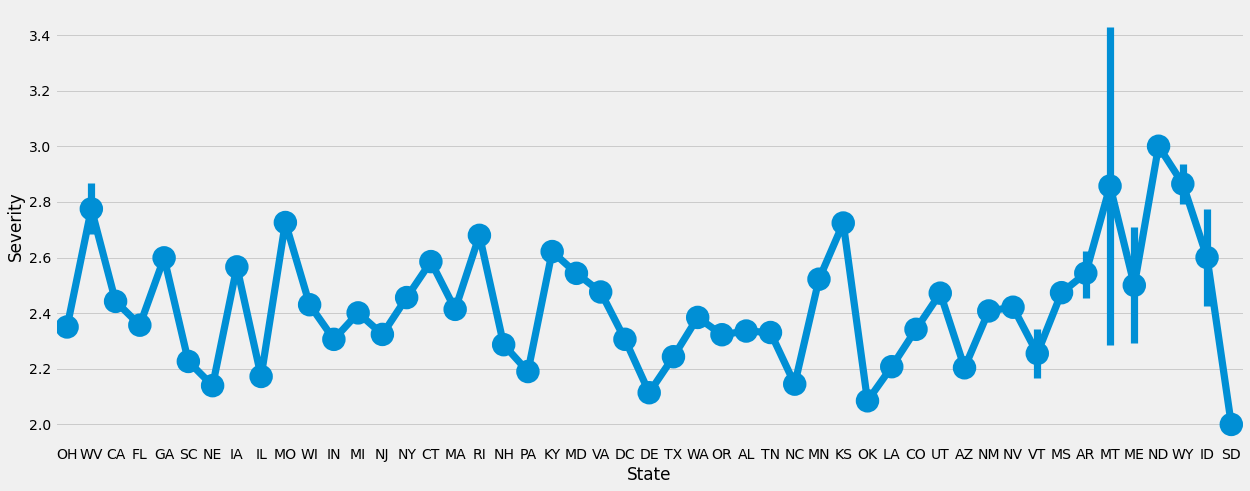

In [55]:
sns.factorplot('State', 'Severity', data=df)
fig= plt.gcf()
fig.set_size_inches(20,7)
plt.show()

In [57]:
df.Weather_Condition.value_counts()

Clear                                  386111
Overcast                               182238
Mostly Cloudy                          142518
Partly Cloudy                           95093
Scattered Clouds                        94684
Light Rain                              50388
Haze                                    14561
Light Snow                              13948
Rain                                    11829
Fog                                      5320
Heavy Rain                               4377
Light Drizzle                            3853
Light Thunderstorms and Rain             2356
Thunderstorm                             2125
Snow                                     1308
Smoke                                    1262
Heavy Thunderstorms and Rain             1108
Thunderstorms and Rain                   1020
Mist                                      924
Patches of Fog                            840
Light Freezing Rain                       826
Drizzle                           

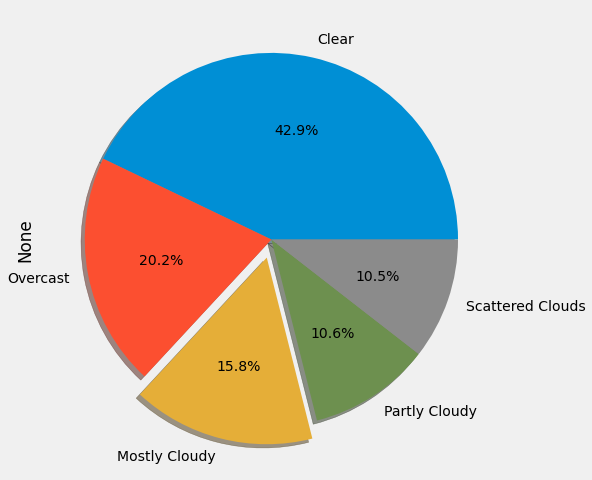

In [58]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition') \
.size() \
.sort_values(ascending= False) \
.iloc[:5] \
.plot.pie(explode= [0,0,0.1,0,0], autopct= '%1.1f%%', shadow=True)

plt.ioff()